In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/NVidia_stock_history.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0


In [3]:
df.index

RangeIndex(start=0, stop=6442, step=1)

<Axes: >

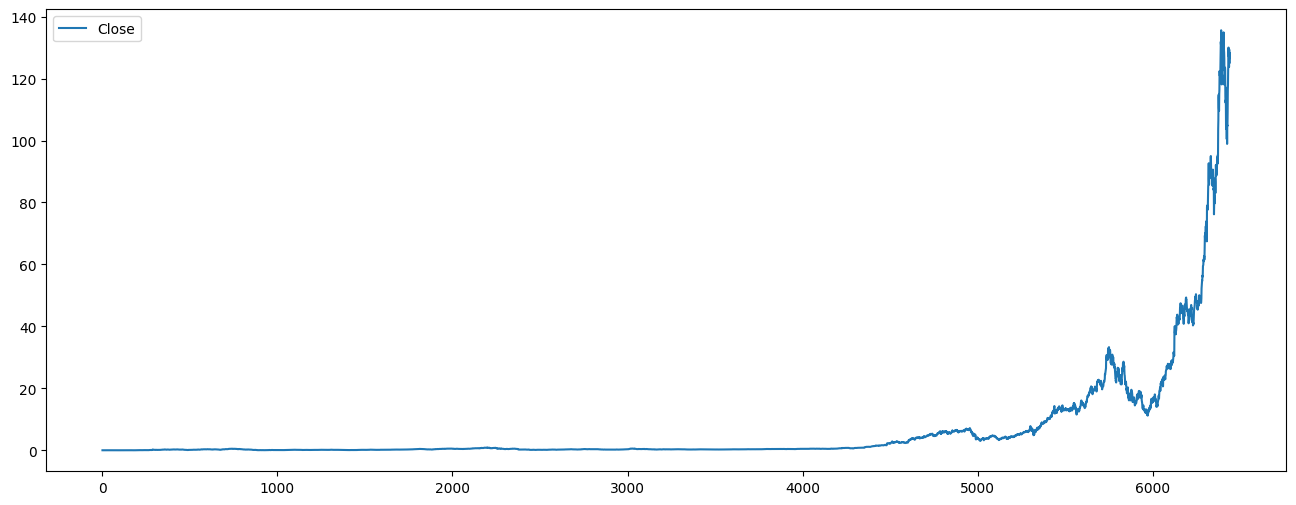

In [5]:
df.plot.line(y='Close', use_index=True, figsize=(16,6))

In [6]:
df.drop('Dividends', axis=1, inplace=True)

In [7]:
df.drop('Stock Splits', axis=1, inplace=True)

In [8]:
df["Tomorrow"] = df["Close"].shift(-1)

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.041562
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.038337
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.038218
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.038098
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.036307


In [10]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [11]:
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
0,1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.041562,1
1,1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.038337,0
2,1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.038218,0
3,1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.038098,0
4,1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.036307,0


In [12]:
df = df.loc["2015-01-01":].copy()

In [13]:
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
2016,2007-01-30 00:00:00-05:00,0.464422,0.473289,0.460295,0.470232,636174000,0.468550,0
2017,2007-01-31 00:00:00-05:00,0.467939,0.472984,0.462129,0.468550,467976000,0.474512,1
2018,2007-02-01 00:00:00-05:00,0.464117,0.476958,0.463200,0.474512,650898000,0.486894,1
2019,2007-02-02 00:00:00-05:00,0.477111,0.489187,0.473136,0.486894,586590000,0.494844,1
2020,2007-02-05 00:00:00-05:00,0.489187,0.498972,0.488423,0.494844,579906000,0.512424,1


In [15]:
df.shape

(4426, 8)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [18]:
train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ['Open', 'High', 'Low', 'Volume', 'Close']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [19]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test['Target'], preds)

0.6153846153846154

<Axes: >

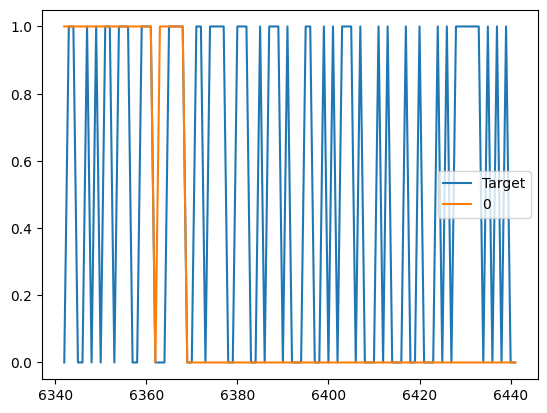

In [20]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

In [28]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  combined.plot()
  return combined

In [29]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model) # Now receives the combined DataFrame
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

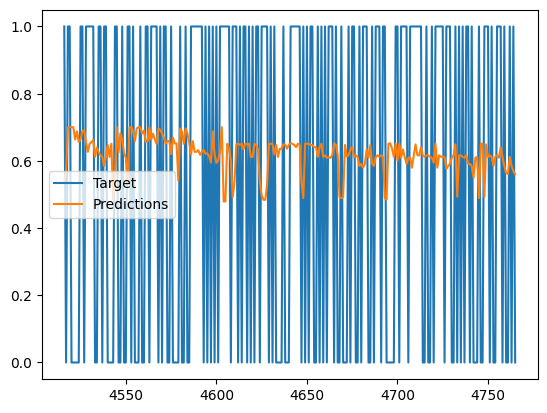

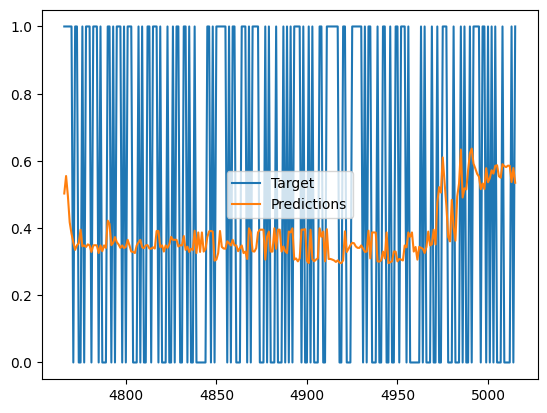

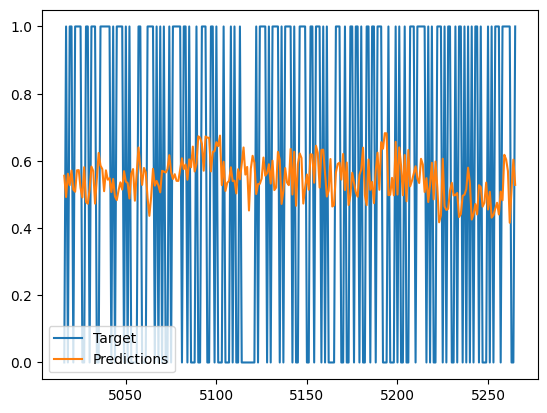

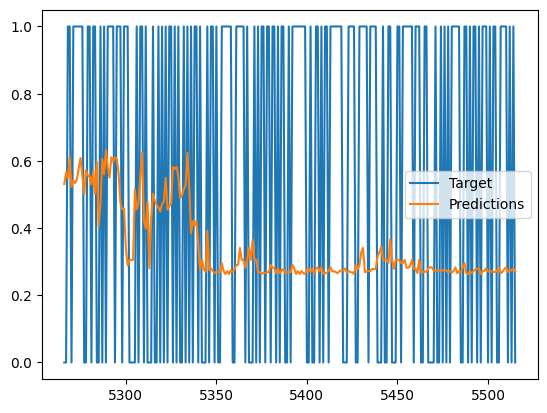

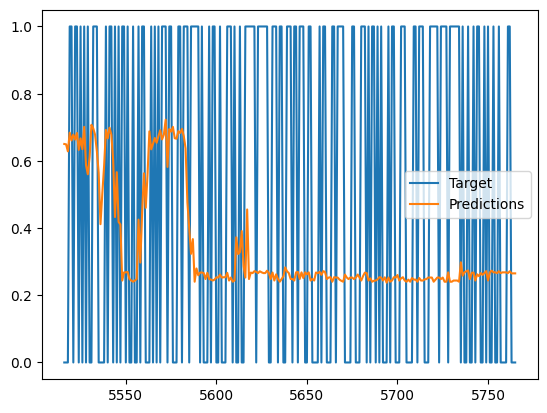

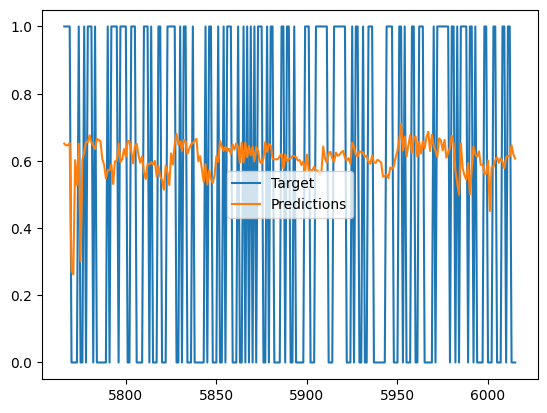

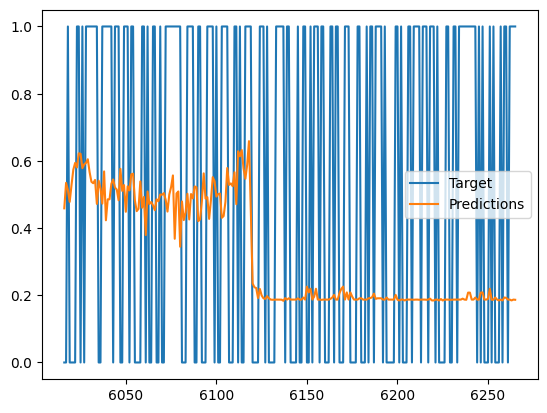

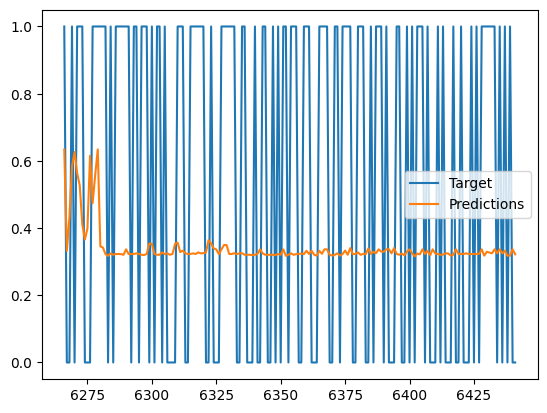

In [30]:
predictions = backtest(df, model, predictors)

In [31]:
predictions['Predictions'].value_counts()

,count
Predictions,
0.187143,61
0.611791,27
0.243878,24
0.320536,23
0.650966,21
...,...
0.496098,1
0.499198,1
0.515763,1


In [33]:
import pandas as pd
from sklearn.metrics import precision_score

predictions['Predictions_Binary'] = (predictions['Predictions'] >= 0.5).astype(int)

precision = precision_score(predictions['Target'], predictions['Predictions_Binary'])

print(precision)

0.532871972318339


In [34]:
predictions['Target'].value_counts() / predictions.shape[0]

,count
Target,
1,0.542056
0,0.457944


In [42]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  # Only calculate rolling mean for the 'Close' column
  rolling_averages = df['Close'].rolling(horizon).mean()

  ratio_column = f'Close_Ratio_{horizon}'
  df[ratio_column] = df['Close'] / rolling_averages

  trend_column = f'Trend_{horizon}'
  # Change here: Select only the 'Target' column before applying shift and rolling sum
  df[trend_column] = df['Target'].shift(1).rolling(horizon).sum()

  new_predictors+= [ratio_column, trend_column]

In [43]:
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
2016,2007-01-30 05:00:00+00:00,0.464422,0.473289,0.460295,0.470232,636174000,0.468550,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,2007-01-31 05:00:00+00:00,0.467939,0.472984,0.462129,0.468550,467976000,0.474512,1,0.998208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,2007-02-01 05:00:00+00:00,0.464117,0.476958,0.463200,0.474512,650898000,0.486894,1,1.006322,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,2007-02-02 05:00:00+00:00,0.477111,0.489187,0.473136,0.486894,586590000,0.494844,1,1.012880,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,2007-02-05 05:00:00+00:00,0.489187,0.498972,0.488423,0.494844,579906000,0.512424,1,1.008098,2.0,1.033064,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df = df.dropna()

In [45]:
df.head()

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
3016,2011-01-18 05:00:00+00:00,0.533597,0.537266,0.515252,0.528323,1813348000,0.513876,0,0.988205,1.0,1.013371,3.0,1.550888,40.0,1.690954,136.0,1.339670,517.0
3017,2011-01-19 05:00:00+00:00,0.528552,0.541164,0.512730,0.513876,1197896000,0.514335,1,0.986139,0.0,0.967784,3.0,1.490737,39.0,1.641849,136.0,1.302889,517.0
3018,2011-01-20 05:00:00+00:00,0.508831,0.517316,0.499659,0.514335,1111408000,0.509519,0,1.000446,1.0,0.976406,3.0,1.474865,39.0,1.640579,136.0,1.303920,517.0
3019,2011-01-21 05:00:00+00:00,0.519838,0.527176,0.508602,0.509519,739244000,0.567076,1,0.995297,1.0,0.977219,2.0,1.444671,39.0,1.622367,136.0,1.291638,516.0
3020,2011-01-24 05:00:00+00:00,0.532909,0.574414,0.526947,0.567076,2056900000,0.549648,0,1.053461,1.0,1.076810,2.0,1.586053,39.0,1.801381,136.0,1.437281,516.0


In [46]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [47]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], preds], axis=1)
  combined.plot()
  return combined

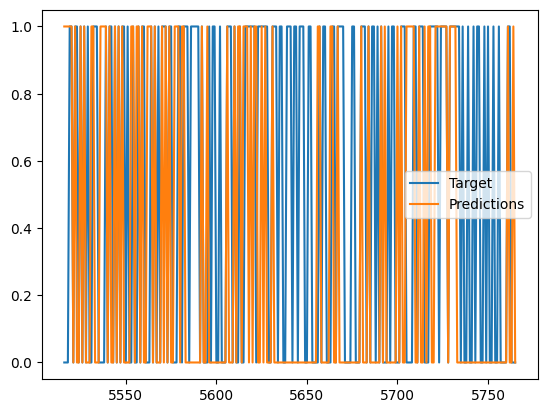

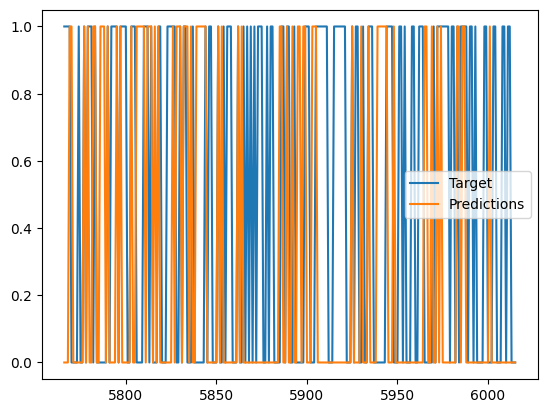

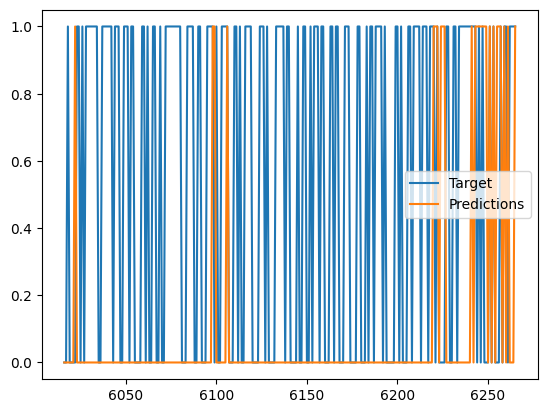

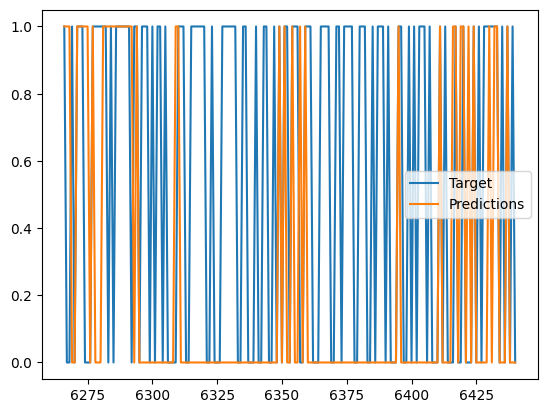

In [48]:
predictions = backtest(df, model, new_predictors)

In [49]:
predictions['Predictions'].value_counts()

,count
Predictions,
0.0,703
1.0,222


In [50]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5675675675675675